In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Lily\Desktop\Python projects\datasets\Customer data.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,11/08/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,11/08/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,06/12/2017,06/16/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [4]:
#I need to change data type for "order date" and "ship date" to datetime
data["Order Date"]=pd.to_datetime(data["Order Date"])
data["Ship Date"]=pd.to_datetime(data["Ship Date"])
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [5]:
#creating a new column of shipping time frame to get the time spent between ordering and shipping

data["Shipping_timeframe"]=data["Ship Date"]-data["Order Date"]
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days


In [6]:
data['Shipping_timeframe'].dtypes

dtype('<m8[ns]')

In [7]:
#Seperating "days" so that we can only remain with numbers for easy calculations

data['Shipping_timeframe'].astype("str").str.split(expand=True)

,0,1
0,3,days
1,3,days
2,4,days
3,7,days
4,7,days
...,...,...
9795,7,days
9796,5,days
9797,5,days
9798,5,days


In [8]:
data[['Shipping_timeframe', '_']] = data['Shipping_timeframe'].astype('str').str.split(expand=True)

In [9]:
data['Shipping_timeframe'].dtypes

dtype('O')

In [13]:
#we convert to "int" so that we can be able to perform calculations on that column later

data['Shipping_timeframe'] =data['Shipping_timeframe'].astype(int) 
data.dtypes

Row ID                         int64
Order ID                      object
Order Date            datetime64[ns]
Ship Date             datetime64[ns]
Ship Mode                     object
Customer ID                   object
Customer Name                 object
Segment                       object
Country                       object
City                          object
State                         object
Postal Code                  float64
Region                        object
Product ID                    object
Category                      object
Sub-Category                  object
Product Name                  object
Sales                        float64
Shipping_timeframe             int32
_                             object
Year                          object
Month                         object
dtype: object

In [14]:
#lets create a column of years and months so that we can later tell which year and months had most and least sales
data["Year"]=data["Order Date"].dt.strftime("%Y")
data["Month"]=data["Order Date"].dt.strftime("%m")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,_,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,days,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,days,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,days,2017,06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,days,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,days,2016,10


In [15]:
Ship_modeav=data.groupby("Ship Mode").agg({"Shipping_timeframe":"mean"})
print(Ship_modeav)

                Shipping_timeframe
Ship Mode                         
First Class               2.179214
Same Day                  0.044610
Second Class              3.249211
Standard Class            5.008363


In [16]:
Salesperyear=data.groupby("Year").agg({"Sales":"mean"})
print(Salesperyear)

           Sales
Year            
2015  245.702103
2016  223.569832
2017  236.855781
2018  221.624315


In [60]:
Salespermonth=data.groupby("Month").agg({"Sales":"mean"})
print(Salespermonth)

            Sales
Month            
01     257.627403
02     199.902745
03     290.549393
04     207.432269
05     212.533412
06     211.052856
07     208.802997
08     227.007110
09     221.642106
10     246.596162
11     241.657496
12     232.619515


In [19]:
#From this, we get how each segment performed as far as sales are concerned

SalesperSegment=data.groupby("Segment").agg({"Sales":"mean"})
print(SalesperSegment)

                  Sales
Segment                
Consumer     225.065777
Corporate    233.150720
Home Office  243.403309


In [20]:
#we obtain list of top 10 customers who have shopped more frequently

TopCustomers=data["Customer Name"].value_counts().nlargest(10)
print(TopCustomers)

Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
Jonathan Doherty       32
Seth Vernon            32
Emily Phan             31
Zuschuss Carroll       31
Arthur Prichep         31
Name: count, dtype: int64


In [21]:
#Checking the cities with most sales
TopCities=data["City"].value_counts().nlargest(10)
print(TopCities)

City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Houston          374
Chicago          308
Columbus         221
San Diego        170
Springfield      161
Name: count, dtype: int64


In [24]:
#Obtaining the days of the week when the orders were made so that we can tell on which day of the week are the sales at the highest

data["Day of the week"]=data["Order Date"].dt.strftime("%A")

In [25]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Shipping_timeframe,_,Year,Month,Day of the week
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,days,2017,11,Wednesday
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,days,2017,11,Wednesday
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,days,2017,06,Monday
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,days,2016,10,Tuesday
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,days,2016,10,Tuesday


In [85]:
#Checking which day of the week had most sales on average

Daysales=data.groupby("Day of the week").agg({"Sales":"mean"}).sort_values("Sales")
print(Daysales)

                      Sales
Day of the week            
Monday           218.952638
Friday           219.972671
Tuesday          222.623570
Sunday           222.931432
Saturday         235.667120
Wednesday        257.029269
Thursday         264.028170


<function matplotlib.pyplot.show(close=None, block=None)>

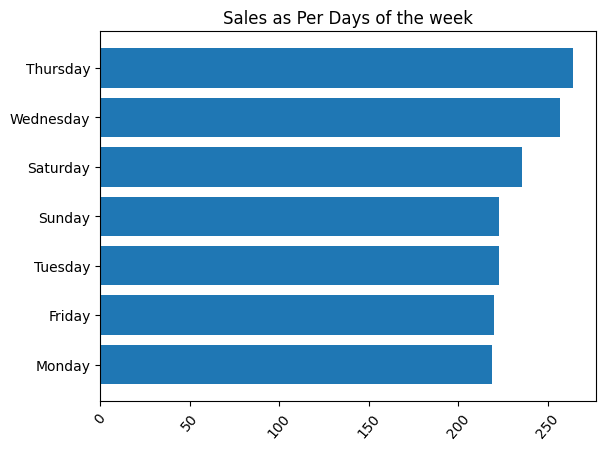

In [86]:
Daysales=data.groupby("Day of the week").agg({"Sales":"mean"}).sort_values("Sales").reset_index()
plt.barh(Daysales["Day of the week"], Daysales["Sales"])
plt.title("Sales as Per Days of the week")
plt.xticks(rotation=50)
plt.show

Text(0.5, 1.0, 'Top Cities in sales')

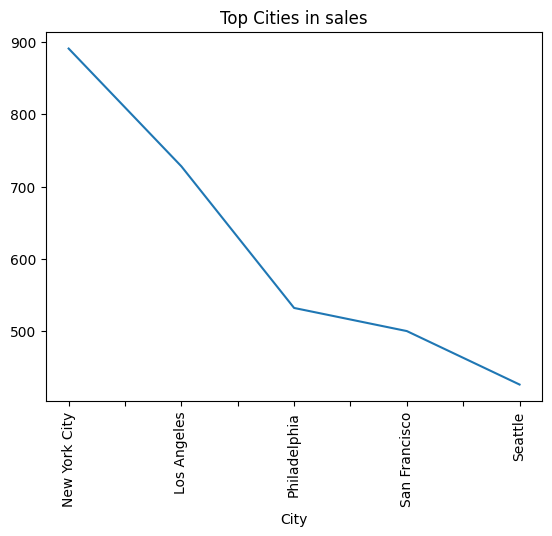

In [80]:
TopCities=data["City"].value_counts().nlargest().plot()
plt.xticks(rotation=90)
plt.title("Top Cities in sales")

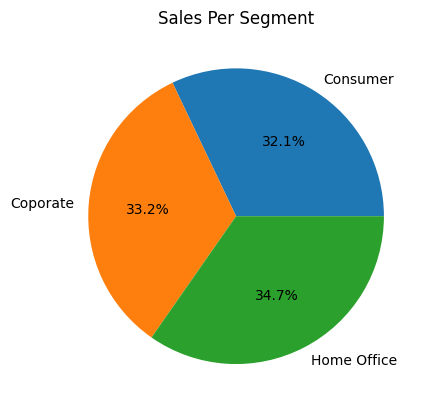

In [35]:
SalesperSegment=data.groupby("Segment").agg({"Sales":"mean"}).reset_index()
mylabels=("Consumer", "Coporate","Home Office")
plt.pie(SalesperSegment["Sales"], labels=mylabels, autopct="%1.1f%%")
plt.title("Sales Per Segment")
plt.show()


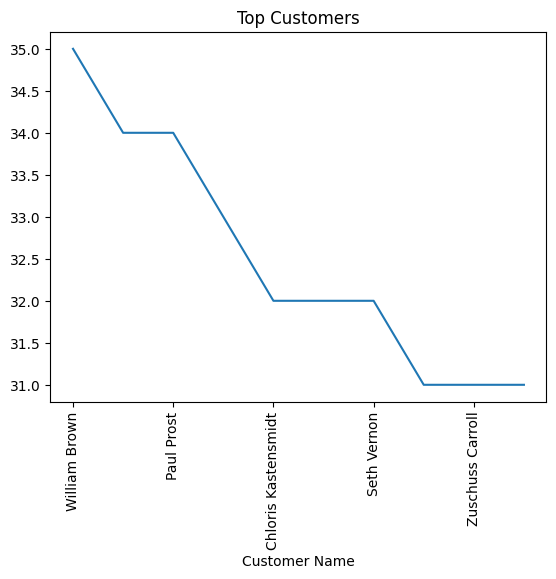

In [79]:
TopCustomers=data["Customer Name"].value_counts().nlargest(10).plot()
plt.xticks(rotation=90)
plt.title("Top Customers")
plt.show()


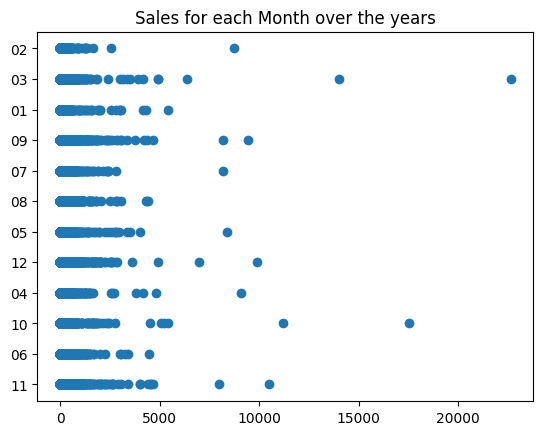

In [72]:
Salespermonth=data.groupby("Month").agg({"Sales":"mean"}).reset_index
plt.scatter(data["Sales"],data["Month"])
plt.title("Sales for each Month over the years")
plt.show()

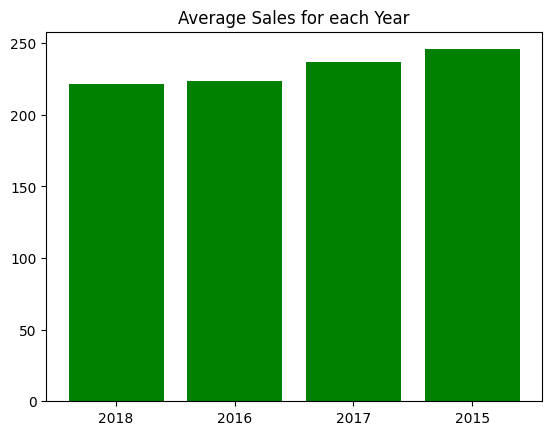

In [89]:
Salesperyear=data.groupby("Year").agg({"Sales":"mean"}).sort_values("Sales").reset_index()
plt.bar(Salesperyear["Year"], Salesperyear["Sales"],color="green")
plt.title("Average Sales for each Year")
plt.show()